In [ ]:
# classe ConsoGES
class ConsoGES:
    def __init__(self, coutGES, utilite, description):
        self.coutGES = coutGES
        self.utilite = utilite
        self.description = description

alimentation = [
    ConsoGES(2.2, 5, "Alimentation très carnée"),
    ConsoGES(1.2, 7, "Alimentation modérément carnée"),
    ConsoGES(0.9, 6, "Alimentation végétarienne"),
    ConsoGES(0.4, 4, "Alimentation végétalienne")
]

transport = [
    ConsoGES(3, 4, "Grosse voiture thermique pour 5000km à l'année et par personne"),
    ConsoGES(2.1, 6, "Petite voiture thermique pour 10000km à l'année et par personne"),
    ConsoGES(1.6, 5, "Voiture électrique de taille moyenne pour 5000km à l'année et par personne"),
    ConsoGES(0.3, 3, "Mobilité douce")
]

logement = [
    ConsoGES(3, 7, "Maison mal isolée thermiquement, 60m2 par personne"),
    ConsoGES(0.2, 6, "Appartement très bien isolé thermiquement, 40m2 par personne")
]

consommation = [
    ConsoGES(2.5, 10, "Consommation importante de biens et services"),
    ConsoGES(1.3, 6, "Consommation sobre de biens et services")
]



In [ ]:
#Pour importer les fonctions du package mip faut exécuter cette cellule et ensuite recharger le notebook
!pip install mip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 441.8/441.8 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: cffi
    Found existing installation: cffi 1.16.0
    Uninstalling cffi-1.16.0:
      Successfully uninstalled cffi-1.16.0


In [ ]:
#Si jamais le notebook indique qu'il ya 2 versions differentes du mip qui sont installés faire exécuter cette cellule et ensuite ré-installer le package mip
pip uninstall mip
pip install --upgrade cffi

Found existing installation: mip 1.15.0
Uninstalling mip-1.15.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/mip-1.15.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/mip/*
Proceed (Y/n)? Y
  Successfully uninstalled mip-1.15.0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mip import Model, xsum, maximize, BINARY

In [ ]:
#classe SacADosGES et ses méthodes
class SacADosGES:
      def __init__(self, consommation, alimentation, transport,logement):
        self.consommation = consommation
        self.alimentation = alimentation
        self.transport = transport
        self.logement=logement

      def getCoutGES(self):
        cout=0
        cout+= self.alimentation.coutGES
        cout+=self.transport.coutGES
        cout+= self.logement.coutGES
        cout+= self.consommation.coutGES
        return cout

      def getUtilite(self):
        utilite=0
        utilite+= self.alimentation.utilite
        utilite+= self.transport.utilite
        utilite+= self.logement.utilite
        utilite+= self.consommation.utilite
        return utilite



      def estValide(self,B):
        if self.getCoutGES()>B:
          #Si jamais le coût du sac dépasse la borne B
          return False
        else:
          return True


#Fonction pour tester l'égalité entre 2 sacs qui serait utile dans la suite du projet
      def __eq__(self, other):
        if isinstance(other, SacADosGES):
            return (self.consommation == other.consommation and
                    self.alimentation == other.alimentation and
                    self.transport == other.transport and
                    self.logement == other.logement)




In [ ]:
def getSacsADos(consommation, alimentation, transport, logement):
        sacs = []
        #Parcourir tout les éléments de toutes les listes pour obtenir toutes les combinaisons possibles de sacs
        for cons in consommation:
            for ali in alimentation:
                for tra in transport:
                    for log in logement:
                        sac = SacADosGES(cons, ali, tra, log)
                        sacs.append(sac)
        return sacs

def filtre(L,B):
        sacs1=[]
        for sac in L:
          if sac.estValide(B):
            sacs1.append(sac)
        return sacs1

 #Tester la fonction
A_getSacsADos=getSacsADos(consommation, alimentation, transport, logement)
#print(A_getSacsADos)

[<__main__.SacADosGES object at 0x795a8c0a3f70>, <__main__.SacADosGES object at 0x795a8c0a2da0>, <__main__.SacADosGES object at 0x795a8c0a2ce0>, <__main__.SacADosGES object at 0x795a8c0a3670>, <__main__.SacADosGES object at 0x795a8c0a3640>, <__main__.SacADosGES object at 0x795a8c0a31f0>, <__main__.SacADosGES object at 0x795a8c0a2e90>, <__main__.SacADosGES object at 0x795a8c0a2f20>, <__main__.SacADosGES object at 0x795a8c0a3eb0>, <__main__.SacADosGES object at 0x795a8c0a2bc0>, <__main__.SacADosGES object at 0x795a8c0a2a10>, <__main__.SacADosGES object at 0x795a8c0fa140>, <__main__.SacADosGES object at 0x795a8c0fa080>, <__main__.SacADosGES object at 0x795a8c0f9fc0>, <__main__.SacADosGES object at 0x795a8c0fa020>, <__main__.SacADosGES object at 0x795a8c0f9f00>, <__main__.SacADosGES object at 0x795a8c0f9f60>, <__main__.SacADosGES object at 0x795a8c0f9ea0>, <__main__.SacADosGES object at 0x795a8c0f9de0>, <__main__.SacADosGES object at 0x795a8c0f8bb0>, <__main__.SacADosGES object at 0x795a8c

In [ ]:
#Classe SystemeRelationnel
class SystemeRelationnel:
   def __init__(self,A,R):
    self.A=A
    self.R=R


#Les prochaines fonctions ont pour but de tester toutes les propriétés classiques des systèmes 
   def reflexive(self):
        for a in self.A:
            if (not((a,a) in self.R)):
              #Si jamais on trouve un élément a tq non(a R a) donc la relation pas refléxive
                return False
        return True

   def irreflexive(self):
        for a in self.A:
            if ((a,a) in self.R):
            #Si jamais on trouve un élément a tq (a R a) donc la relation pas irrefléxive
                return False
        return True

   def symetrie(self):
    for (a,b) in self.R:
      if (not((b,a) in self.R)):
        #Si jamais on trouve un couple (a,b) tq (a R b) mais non(b R a) donc la relation pas symétrique
        return False
    return True

   def asymetrie(self):
    for (a,b) in self.R:
      if ((b,a) in self.R):
        #Si jamais on trouve un couple (a,b) tq (a R b) et (b R a) donc la relation pas asymétrique
        return False
    return True

   def transitivite(self):
    for a in self.A:
      for b in self.A:
        for c in self.A:
            if ((a,b) in self.R and (b,c) in self.R):
              #Si jamais on trouve deux couples (a,b) et (b,c) tq (a R b) et (b R c) mais non(a R c) donc la relation pas transitive
              if (not((a,c) in self.R)):
                return False
      return True

   def neg_transitivite(self):
        for a in self.A:
            for b in self.A:
                for c in self.A:
                    if (not((a, b) in self.R or (b, c) in self.R)):
                       #Si jamais on trouve deux couples (a,b) et (b,c) tq non(a R b) et non(b R c) mais (a R c) donc la relation pas negativement transitive
                       #Remarque d'après les lois de Morgan: non((a R b) ou (b R c)) <=> (non(a R b ) et non(b R c))
                        if ((a,c) in self.R):
                            return False
        return True

   def totale(self):
    for a in self.A:
      for b in self.A:
        if not(a.__eq__(b)):
            if (not ((a,b) in self.R or (b,a) not in self.R)):
              #Si jamais on trouve deux éléments a et b tq non(a R b) et non(b R a) donc la relation pas totale
              #Remarque d'après les lois de Morgan: non((a R b) ou (b R a)) <=> non(a R b) et non(b R a)
                return False
      return True

#Pour la negative transitivité nous avons remarqué que lorsqu'on la teste sur LexU et LexC, elle prend enormèment de temps donc on a recodé cette fonction pour rendre son excécution plus simple et courte
   def LU(self,a,b):
    return ((a.getUtilite()>b.getUtilite())  or ((a.getUtilite()==b.getUtilite() and a.getCoutGES()<b.getCoutGES())))

   def LC(self,a,b):
    return ((a.getCoutGES()<b.getCoutGES())  or ((a.getUtilite()>b.getUtilite() and a.getCoutGES()==b.getCoutGES())))


   def neg_transitivite_LU(self):
        for a in self.A:
            for b in self.A:
                for c in self.A:
                    if (not(self.LU(a, b)) and not(self.LU(b, c))):
                      #Même principe que la fonction neg_transitivite() mais en utilisant la fonction LU() pour vérifier si (a R b)
                        if self.LU(a, c):
                            return False
        return True

   def neg_transitivite_LC(self):
        for a in self.A:
            for b in self.A:
                for c in self.A:
                    if (not(self.LC(a, b)) and not(self.LC(b, c))):
                       #Même principe que la fonction neg_transitivite() mais en utilisant la fonction LC() pour vérifier si (a R b)
                        if self.LC(a, c):
                            return False
        return True

#Pareto dominance
   def getSR_PD(self):
    R1=[]
    for a in self.A:
      for b in self.A:
          if ((a.getUtilite()>=b.getUtilite() and a.getCoutGES()<b.getCoutGES()) or (a.getUtilite()>b.getUtilite() and a.getCoutGES()<=b.getCoutGES())):
            #D'après la définition de la relation
            R1.append((a,b))

    return SystemeRelationnel(self.A, R1)

   def afficher_front_pareto(self):
    PD = self.getSR_PD()
    dom = []
    for (a, b) in PD.R:
        dom.append(b)
    non_dom = [sac for sac in PD.A if sac not in dom]
    x = [sac.getCoutGES() for sac in non_dom]
    y = [sac.getUtilite() for sac in non_dom]
    plt.scatter(x, y)
    plt.xlabel('Coût GES')
    plt.ylabel('Utilité')
    plt.title('Front de Pareto')
    plt.show()

#relations lexicographiques
   def getSR_LexU(self):
      R1=[]
      for a in self.A:
        for b in self.A:
            if ((a.getUtilite()>b.getUtilite())  or ((a.getUtilite()==b.getUtilite() and a.getCoutGES()<b.getCoutGES()))):
              #D'après la définition de la relation
              R1.append((a,b))

      return SystemeRelationnel(self.A, R1)

   def getSR_LexC(self):
      R1=[]
      for a in self.A:
        for b in self.A:
            if ((a.getCoutGES()<b.getCoutGES())  or ((a.getUtilite()>b.getUtilite() and a.getCoutGES()==b.getCoutGES()))):
              #D'après la définition de la relation
              R1.append((a,b))

      return SystemeRelationnel(self.A, R1)

#relation bornée
   def getSR_Borne(self,B):
      R1=[]
      for a in self.A:
        for b in self.A:
            if ((a.getCoutGES()<=B and b.getCoutGES()>B)  or (a.getUtilite()>b.getUtilite() and a.getCoutGES()<=B and b.getCoutGES()<=B)):
              #D'après la définition de la relation
              R1.append((a,b))

      return SystemeRelationnel(self.A, R1)

#kendal-tau distance
   def distance(self, SR2):
      d=0
      for a in self.A:
        for b in self.A:
          #paire (a,b) lorsque a!=b
          if not(a.__eq__(b)):
            if (((a,b) in self.R and not((a,b) in SR2.R)) or ((a,b) in SR2.R and not((a,b) in self.R))):
              d+=0.5
      for a in self.A:
         if (((a,a) in self.R and (a,a) not in SR2.R) or ((a,a) in SR2.R and (a,a) not in self.R)):
              d+=0.5
      #D'après la définition de la distance

      return d

   def utiliteMax1(self, B):
        utilite_max = 0
        sac_max= None
        for sac in self.A:
            if (sac.estValide(B)):
              if (sac.getUtilite()>utilite_max):
                #Si jamais on trouve un sac avec meilleure utilité on le retient
                utilite_max=sac.getUtilite()
                sac_max=sac
        return utilite_max, sac_max



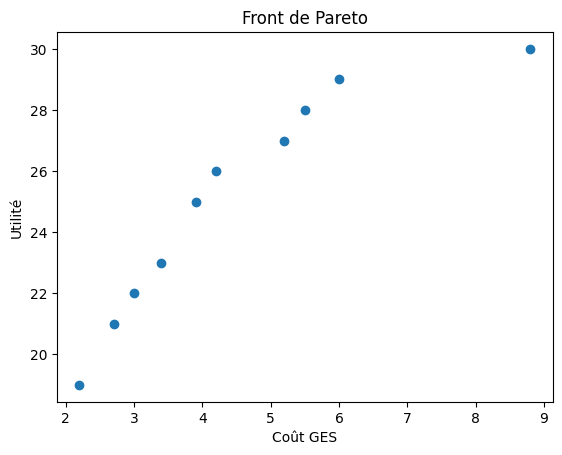

Les propriétés de la relation de Pareto dominance:
irreflexivite: True
reflexivite: False
asymetrie: True
symetrie: False
totale: False
transitive: True
negativement transitive: False


Les propriétés de la relation lexicographiqueC:
irreflexivite: True
reflexivite: False
asymetrie: True
symetrie: False
totale: False
transitive: True
negativement transitive: True


Les propriétés de la relation lexicographiqueU:
irreflexivite: True
reflexivite: False
asymetrie: True
symetrie: False
totale: False
transitive: True
negativement transitive: True




In [ ]:
L=getSacsADos(consommation, alimentation, transport, logement)
SR1=SystemeRelationnel(L,[])
SR1.afficher_front_pareto()
SR1_PD=SR1.getSR_PD()
SR1_LexU=SR1.getSR_LexU()
SR1_LexC=SR1.getSR_LexC()
SR1_borne1=SR1.getSR_Borne(5)
print("Les propriétés de la relation de Pareto dominance:")
print("irreflexivite:",SR1_PD.irreflexive())
print("reflexivite:",SR1_PD.reflexive())
print("asymetrie:",SR1_PD.asymetrie())
print("symetrie:",SR1_PD.symetrie())
print("totale:",SR1_PD.totale())
print("transitive:",SR1_PD.transitivite())
print("negativement transitive:",SR1_PD.neg_transitivite())
print("\n")

print("Les propriétés de la relation lexicographiqueC:")
print("irreflexivite:",SR1_LexC.irreflexive())
print("reflexivite:",SR1_LexC.reflexive())
print("asymetrie:",SR1_LexC.asymetrie())
print("symetrie:",SR1_LexC.symetrie())
print("totale:",SR1_LexC.totale())
print("transitive:",SR1_LexC.transitivite())
print("negativement transitive:",SR1_LexC.neg_transitivite_LC())
print("\n")

print("Les propriétés de la relation lexicographiqueU:")
print("irreflexivite:",SR1_LexU.irreflexive())
print("reflexivite:",SR1_LexU.reflexive())
print("asymetrie:",SR1_LexU.asymetrie())
print("symetrie:",SR1_LexU.symetrie())
print("totale:",SR1_LexU.totale())
print("transitive:",SR1_LexU.transitivite())
print("negativement transitive:",SR1_LexU.neg_transitivite_LU())
print("\n")




In [ ]:
#Calcul des distances entre les différents sytèmes (commentaires dans le rapport)
B=[5, 7, 10, 12]
print("Distance entre le SR vide et le SR de la pareto dominance est", SR1.distance(SR1_PD))
print("Distance entre SR de la relation lexicographiqueC et le SR de la pareto dominance est", SR1_LexC.distance(SR1_PD))
print("Distance entre SR de la relation lexicographiqueU et le SR de la pareto dominance est", SR1_LexU.distance(SR1_PD))
print("Distance entre SR de la relation lexicographiqueU et le SR de la relation lexicographiqueC est", SR1_LexC.distance(SR1_LexU))
for b in B:
  SR1_borne=SR1.getSR_Borne(b)
  print("Distance entre SR de la pareto dominance et le SR borné pour b=",b,"est:",SR1_PD.distance(SR1_borne))
  print("Distance entre SR de la relation lexicographiqueU et le SR borné pour b=",b,"est:",SR1_LexU.distance(SR1_borne))
  print("Distance entre SR de la relation lexicographiqueC et le SR borné pour b=",b,"est:", SR1_LexC.distance(SR1_borne))




Distance entre le SR vide et le SR de la pareto dominance est 381.5
Distance entre SR de la relation lexicographiqueC et le SR de la pareto dominance est 626.5
Distance entre SR de la relation lexicographiqueU et le SR de la pareto dominance est 626.5
Distance entre SR de la relation lexicographiqueU et le SR de la relation lexicographiqueC est 1253.0
Distance entre SR de la pareto dominance et le SR borné pour b= 5 est: 580.5
Distance entre SR de la relation lexicographiqueU et le SR borné pour b= 5 est: 1140.0
Distance entre SR de la relation lexicographiqueC et le SR borné pour b= 5 est: 636.0
Distance entre SR de la pareto dominance et le SR borné pour b= 7 est: 658.0
Distance entre SR de la relation lexicographiqueU et le SR borné pour b= 7 est: 835.5
Distance entre SR de la relation lexicographiqueC et le SR borné pour b= 7 est: 622.5
Distance entre SR de la pareto dominance et le SR borné pour b= 10 est: 713.0
Distance entre SR de la relation lexicographiqueU et le SR borné pour

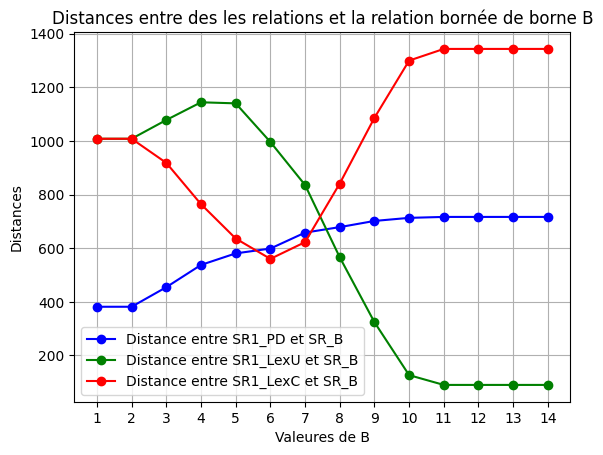

In [ ]:
#Reprèsentons les diffèrentes distances pour différentes valeures de B sur un graphique
B1=[1,2,3,4,5,6,7,8,9,10,11,12,13,14]
D_PD=[]
D_U=[]
D_C=[]
for b in B1:
  SR1_borne=SR1.getSR_Borne(b)
  D_PD.append( SR1_PD.distance(SR1_borne))
  D_U.append(SR1_LexU.distance(SR1_borne))
  D_C.append(SR1_LexC.distance(SR1_borne))

plt.plot(B1, D_PD, label='Distance entre SR1_PD et SR_B', color='blue',marker='o')
plt.plot(B1, D_U, label='Distance entre SR1_LexU et SR_B', color='green',marker='o')
plt.plot(B1, D_C, label='Distance entre SR1_LexC et SR_B', color='red', marker='o')

plt.xlabel('Valeures de B')
plt.ylabel('Distances')
plt.title('Distances entre des les relations et la relation bornée de borne B')
plt.xticks(B1)
plt.grid(True)
plt.legend()
plt.show()

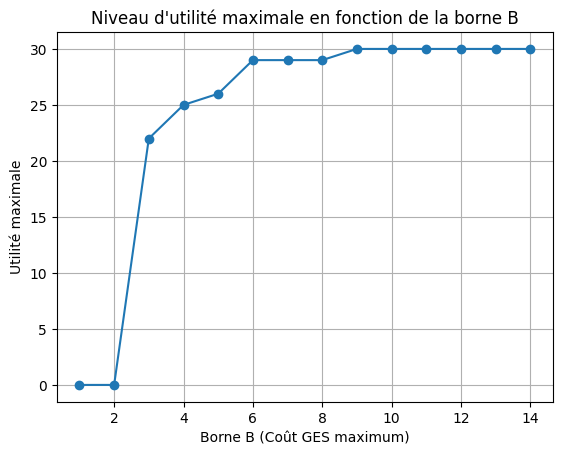

In [ ]:
#Niveau d’utilité optimal en fonction de la borne B (commentaires dans le rapport) 
utilites_max = [SR1.utiliteMax1(B)[0] for B in B1]
plt.plot(B1, utilites_max, marker='o')
plt.xlabel('Borne B (Coût GES maximum)')
plt.ylabel('Utilité maximale')
plt.title('Niveau d\'utilité maximale en fonction de la borne B')
plt.grid(True)
plt.show()

In [ ]:
#Liste avec tout les éléments de ConsoGES qui va servir pour résoudre le PL
C=[]
C.extend(consommation)
C.extend(alimentation)
C.extend(transport)
C.extend(logement)

In [ ]:
#Fonction auxiliaire qui nous permettra d'obtenir l'utilité de chaque sac selon sa composition et une liste u
def Utilite_sac(k, C, u):
        utilite = 0
        utilite += u[C.index(k.alimentation)]
        utilite += u[C.index(k.transport)]
        utilite += u[C.index(k.logement)]
        utilite += u[C.index(k.consommation)]
        return utilite
#Résolution du PL pour trouver si k1 domine k2 ordinalement ou pas
def estOrdDomine(P, k1, k2, C):
    model = Model()

    # Variables du PL
    u = [model.add_var(var_type="C",lb=0, ub=1) for i in C]

    # Contraintes :
    for (k11, k22) in P:
        model += (Utilite_sac(k11, C, u) >= Utilite_sac(k22, C, u) +(10)**-10)

    # Maximiser la différence entre les utilités attribuées à k1 et k2
    model.objective =maximize(Utilite_sac(k2, C, u) - Utilite_sac(k1, C, u))
    model.optimize()
    #On a écrit dans un fichier pour garder trace de la valeures des utilités
    with open("valeures.txt", "w") as f:
        f.write(f"fonction objective: {model.objective_value}\n")
        f.write("variables:\n")
        for var in u:
            f.write(f"{var.name}: {var.x}\n")
    # Vérifier si k1 domine ordinairement k2

    if (model.objective_value<0):
      return True
    else:
      return False


# essais pour vérifier que la fonction marche bien
'''
sac1 = SacADosGES(consommation[1],alimentation[0], transport[1], logement[0])
sac2 = SacADosGES(consommation[0],alimentation[0], transport[1], logement[0])
sac3 = SacADosGES( consommation[0],alimentation[1], transport[1], logement[0])
sac4 = SacADosGES(consommation[0],alimentation[1], transport[1], logement[0])

preferences = SR1_PD.R[:2]
preferences1=[(sac1,sac3)]

dominance = estOrdDomine(preferences1, sac3, sac1, C)
print(dominance)
if (dominance):
  print("k1 domine ordinalement k2")
else:
  print("k1 ne domine pas ordinalement k2")
'''
def nonOrdDomines(SR, P, B):
        non_domines = []
        for sac in SR.A:
            if sac.getCoutGES()<= B:
              non_ord = True
              for sac1 in SR.A:
                    if (sac1.getCoutGES() <= B):
                        if (estOrdDomine(P, sac1, sac,C)):
                          #Si jamais sac1 domine sac donc sac n'est plus ordinalement dominé
                          non_ord=False
                          break
              if (non_ord):
                 non_domines.append(sac)
        return non_domines



In [ ]:
#Une liste de préférence selon le coût GES: on préfére les consommation qui ont un plus petit coût GES
preferences_prix=[]
for sac in SR1.A:
  for sac1 in SR1.A:
    if not(sac.__eq__(sac1)):
      if (sac.getCoutGES()>sac1.getCoutGES()):
        preferences_prix.append((sac1,sac))
      elif(sac1.getCoutGES()>sac.getCoutGES()):
        preferences_prix.append((sac,sac1))

In [ ]:
#Tests numériques
B2=[i for i in range(2,15)]
preferences = SR1_PD.R
for b in B2:
  print("Résultats pour B=", b)
  preferences = SR1_PD.R[:10]
  y=nonOrdDomines(SR1,preferences , b)
  print("Préférences générées par la Pareto Dominance:", "Taille de R: ", len(preferences)," taille de l'output:", len(y))
  preferences = SR1_PD.R[:70]
  y=nonOrdDomines(SR1,preferences , b)
  print("Préférences générées par la Pareto Dominance:", "Taille de R: ", len(preferences)," taille de l'output:", len(y))
  preferences = SR1_PD.R[:200]
  y=nonOrdDomines(SR1,preferences , b)
  print("Préférences générées par la Pareto Dominance:", "Taille de R: ", len(preferences)," taille de l'output:", len(y))
  preferences = SR1_PD.R
  y=nonOrdDomines(SR1,preferences , b)
  print("Préférences générées par la Pareto Dominance:", "Taille de R: ", len(preferences)," taille de l'output:", len(y))
  preferences_prix3=preferences_prix[:500]
  y1=nonOrdDomines(SR1,preferences_prix3 , b)
  print("Préférences de prix: B vaut,", b, "Taille de R", len(preferences_prix3)," taille de l'output:", len(y1))

Résultats pour B= 2
Préférences générées par la Pareto Dominance: Taille de R:  10  taille de l'output: 0
Préférences générées par la Pareto Dominance: Taille de R:  70  taille de l'output: 0
Préférences générées par la Pareto Dominance: Taille de R:  200  taille de l'output: 0
Préférences générées par la Pareto Dominance: Taille de R:  763  taille de l'output: 0
Préférences de prix: B vaut, 2 Taille de R 500  taille de l'output: 0
Résultats pour B= 3
Préférences générées par la Pareto Dominance: Taille de R:  10  taille de l'output: 3
Préférences générées par la Pareto Dominance: Taille de R:  70  taille de l'output: 3
Préférences générées par la Pareto Dominance: Taille de R:  200  taille de l'output: 3
Préférences générées par la Pareto Dominance: Taille de R:  763  taille de l'output: 3
Préférences de prix: B vaut, 3 Taille de R 500  taille de l'output: 1
Résultats pour B= 4
Préférences générées par la Pareto Dominance: Taille de R:  10  taille de l'output: 9
Préférences générées p

In [ ]:
#Extension: Critère environnemental de 1 à 10. Réecriture des 2 classes pour ajouter le critère en plus.

class ConsoGES_E:
    def __init__(self, coutGES, utilite, description, scoreE):
        self.coutGES = coutGES
        self.utilite = utilite
        self.description = description
        self.scoreE=scoreE

alimentationE = [
    ConsoGES_E(2.2, 5, "Alimentation très carnée",1),
    ConsoGES_E(1.2, 7, "Alimentation modérément carnée",4),
    ConsoGES_E(0.9, 6, "Alimentation végétarienne",9),
    ConsoGES_E(0.4, 4, "Alimentation végétalienne",8)
]

transportE = [
    ConsoGES_E(3, 4, "Grosse voiture thermique pour 5000km/an/personne",3),
    ConsoGES_E(2.1, 6, "Petite voiture thermique pour 10000km/an/personne",3),
    ConsoGES_E(1.6, 5, "Voiture électrique de taille moyenne pour 5000km/an/personne",5),
    ConsoGES_E(0.3, 3, "Mobilité douce",9)
]

logementE = [
    ConsoGES_E(3, 7, "Maison mal isolée thermiquement, 60m2/personne",3),
    ConsoGES_E(0.2, 6, "Appartement très bien isolé thermiquement, 40m2/personne",8)
]

consommationE = [
    ConsoGES_E(2.5, 10, "Consommation importante de biens et services",2),
    ConsoGES_E(1.3, 6, "Consommation sobre de biens et services",8)
]

In [ ]:
class SacADosGES_E:
      def __init__(self, consommation, alimentation, transport,logement):
        self.consommation = consommation
        self.alimentation = alimentation
        self.transport = transport
        self.logement=logement


      def getCoutGES(self):
        cout=0
        cout+= self.alimentation.coutGES
        cout+=self.transport.coutGES
        cout+= self.logement.coutGES
        cout+= self.consommation.coutGES
        return cout

      def getUtilite(self):
        utilite=0
        utilite+= self.alimentation.utilite
        utilite+= self.transport.utilite
        utilite+= self.logement.utilite
        utilite+= self.consommation.utilite
        return utilite

#Définition de la nouvelle fonction pour obtenir le score environnemental total.
      def getScore(self):
        s=0
        s+= self.alimentation.scoreE
        s+= self.transport.scoreE
        s+= self.logement.scoreE
        s+= self.consommation.scoreE
        return s

#Redéfinition de cette fonction pour ajouter une contrainte sur le score environnemental
      def estValide(self,B,S):
        if (self.getCoutGES()<=B and self.getScore()<=S):
          return True
        else:
          return False

#Fonction pour tester l'égalité entre 2 sacs
      def __eq__(self, other):
        if isinstance(other, SacADosGES):
            return (self.consommation == other.consommation and
                    self.alimentation == other.alimentation and
                    self.transport == other.transport and
                    self.logement == other.logement)
        return False



def getSacsADos_E(consommation, alimentation, transport, logement):
        sacs = []
        for cons in consommation:
            for ali in alimentation:
                for tra in transport:
                    for log in logement:
                        sac = SacADosGES_E(cons, ali, tra, log)
                        sacs.append(sac)
        return sacs

#Redéfinition de cette fonction pour ajouter une contrainte sur le score environnemental
def filtre_E(L,B,S):
        sacs1=[]
        for sac in L:
          if sac.estValide(B,S):
            sacs1.append(sac)
        return sacs1

A_getSacsADos_E=getSacsADos_E(consommation, alimentation, transport, logement)



In [ ]:
class SystemeRelationnel_E:
   def __init__(self,A,R):
    self.A=A
    self.R=R

#La relation Pareto dominance modifiée
   def getSR_PD(self):
    R1=[]
    for a in self.A:
      for b in self.A:
          if ((a.getUtilite()>=b.getUtilite() and a.getCoutGES()<b.getCoutGES() and a.getScore()>=b.getScore()) or (a.getUtilite()>b.getUtilite() and a.getCoutGES()<=b.getCoutGES() and  a.getScore()>=b.getScore()) or (a.getUtilite()>b.getUtilite() and a.getCoutGES()<b.getCoutGES() and  a.getScore()>b.getScore())):
            R1.append((a,b))

    return SystemeRelationnel(self.A, R1)

   def utiliteMax1(self, B,S):
        utilite_max = 0
        sac_max= None
        for sac in self.A:
            if (sac.estValide(B,S)):
              if (sac.getUtilite()>utilite_max):
                utilite_max=sac.getUtilite()
                sac_max=sac
        return utilite_max, sac_max



Nous allons alors représenter l'utilité maximale mais cette fois en fonction de 2 critères.

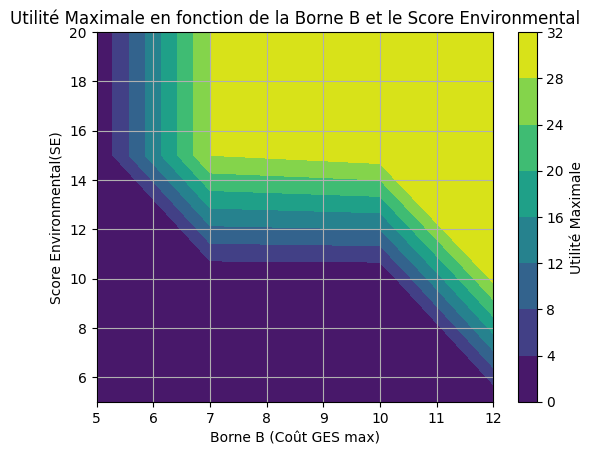

In [ ]:
LE=getSacsADos_E(consommationE, alimentationE, transportE, logementE)
SR_E=SystemeRelationnel_E(LE,[])
BE=[5,7,10,12]
SE=[5,10,15,20]
SR_E_PD=SR_E.getSR_PD()
utilites_max_E = [SR_E.utiliteMax1(b,s)[0] for b in BE for s in SE]

#transfotmer utilites_max_E en une liste à 2 dimensions
utilites_max_E_2D = np.array(utilites_max_E).reshape(len(BE), len(SE))
BE_grid, SE_grid = np.meshgrid(BE, SE)
contour = plt.contourf(BE_grid, SE_grid, utilites_max_E_2D, cmap='viridis')
plt.colorbar(contour, label='Utilité Maximale')
plt.xlabel('Borne B (Coût GES max)')
plt.ylabel('Score Environmental(SE)')
plt.title('Utilité Maximale en fonction de la Borne B et le Score Environmental')
plt.grid(True)
plt.show()


On remarque que si le score environnmental est bas, une augmentation du coût en carbone B ne fait pas trop augmenter l'utilité maximale. Cependant, pour les valeures de B et S choisies, plus le score augmente plus l'utilité maximale est sensible à une augmentation du coût carbone B.